# Task 3b Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
filters = [ 'f090w', 'f150w', 'f200w','f277w','f356w','f444w']

In [3]:
cat = pickle.load(open('data/cat.p', 'rb'))  # read in signal catalogue

In [4]:
fluxes = {f: cat[f'{f}_signal'] for f in filters} 
errors = {f: cat[f'{f}_noise']  for f in filters}

In [5]:
r1 = fluxes['f150w']/fluxes['f200w'] # break colour (mag) - usually on y-axis
r2 = fluxes['f090w']/fluxes['f150w'] # slope colour (mag) - usually on x-axis

--- plot all objects

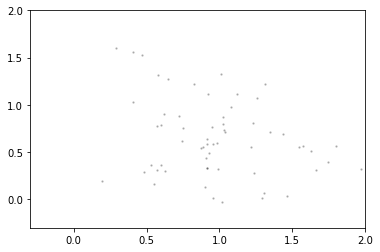

In [6]:
plt.scatter(r1, r2, s=2, c='k', alpha=0.2)

plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()

--- define objects meeting the selection according to the criteria given in the script

In [7]:
SN_limit = 10.
s_flux = (fluxes['f200w']/errors['f200w']>SN_limit)

In [8]:
#opt_SN_limit = 2.
#s_opt = (fluxes['f435w']/errors['f435w']<2)&(fluxes['f606w']/errors['f606w']<2)&(fluxes['f775w']/errors['f775w']<2)

In [9]:
c_cut = (0.75, 0.4)
s_col = (r1>c_cut[0]) & (r2<c_cut[1])

In [10]:
s = s_flux & s_col # --- combine all selections together

---Plot selection window and any objects that fall inside window

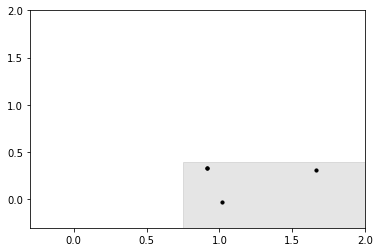

In [11]:
plt.scatter(r1[s], r2[s], s=10, c='k')
plt.fill_between([c_cut[0], 5], [c_cut[1]]*2, [-2]*2, color='k', alpha=0.1)
plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()

--- print the segmentation map IDs of the candidates

In [12]:
id = np.arange(r1.size)+1

In [13]:
print(f'ids = {id[s]}')

ids = [10 18 19 44]
